# Project 7.1 Fashion MNIST by tutorial
https://www.tensorflow.org/tutorials/keras/classification

### Code setup

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Data import

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### EDA

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels.shape

(10000,)

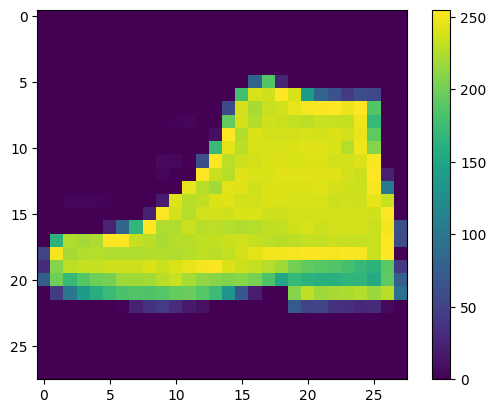

In [12]:
fig, ax = plt.subplots()
img1 = ax.imshow(train_images[42])
fig.colorbar(img1, ax=ax)
ax.grid(False)

In [14]:
train_images[42].max()

255

### Scaling image data to 0-1 range

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

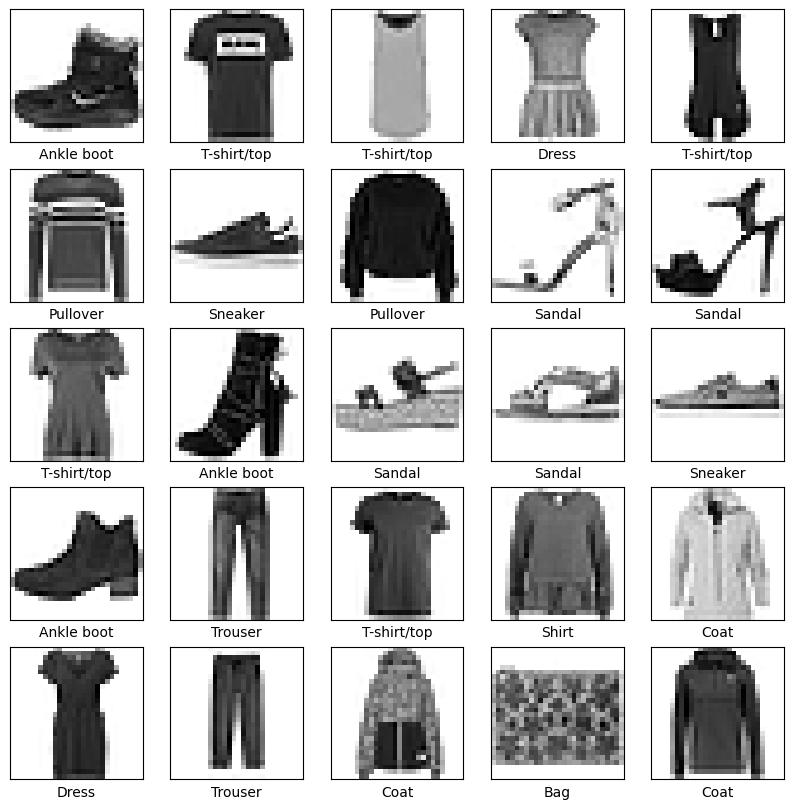

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
train_images[42]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### base dense model
will require flattening the images first to a series of numbers

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#### Aside - visualizing the effects of layers

In [31]:
# from keras.models import Model

# test_input = layers.Input(shape=(28,28))

# flatten_only = layers.Flatten()(test_input)
# flatten_model = Model(inputs = test_input, outputs = flatten_only)
# flattened = flatten_model.predict(train_images[42])
# flattened.shape

In [30]:
# train_images[42].shape

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 2s 1ms/step - loss: 0.5034 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3787 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3412 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3176 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2977 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2840 - accuracy: 0.8952
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2600 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2503 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2

In [36]:
history_df = pd.DataFrame(history.history)

<Axes: >

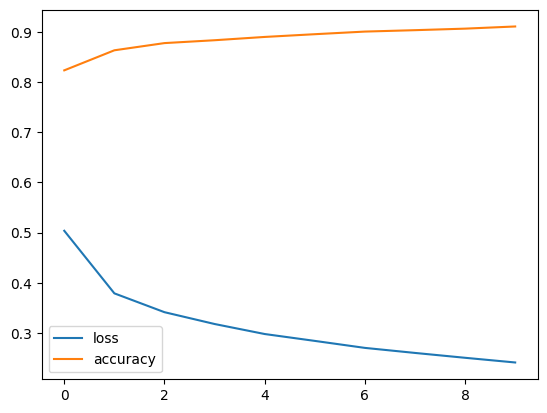

In [38]:
history_df.plot()

In [39]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.3508 - accuracy: 0.8817 - 288ms/epoch - 920us/step


In [40]:
preds = model.predict(test_images)

313/313 [==============================] - 0s 603us/step


In [42]:
preds[0]

array([-10.71442  , -18.952215 , -16.908941 , -21.273735 , -14.589776 ,
        -4.0057936, -11.429096 ,  -0.5203825,  -9.696933 ,   5.102387 ],
      dtype=float32)

### Softmax

In [43]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [45]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 651us/step


In [46]:
predictions[0]

array([1.3465822e-07, 3.5612631e-11, 2.7478095e-10, 3.4944660e-12,
       2.7937463e-09, 1.1034485e-04, 6.5895094e-08, 3.6011990e-03,
       3.7249612e-07, 9.9628782e-01], dtype=float32)

In [47]:
np.argmax(predictions[0])

9

In [48]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

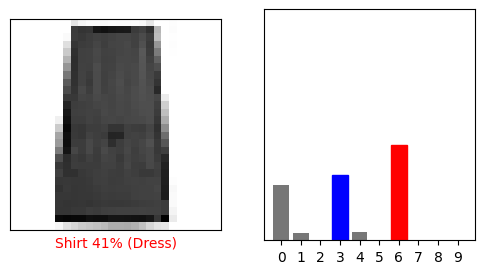

In [53]:
i = 42
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

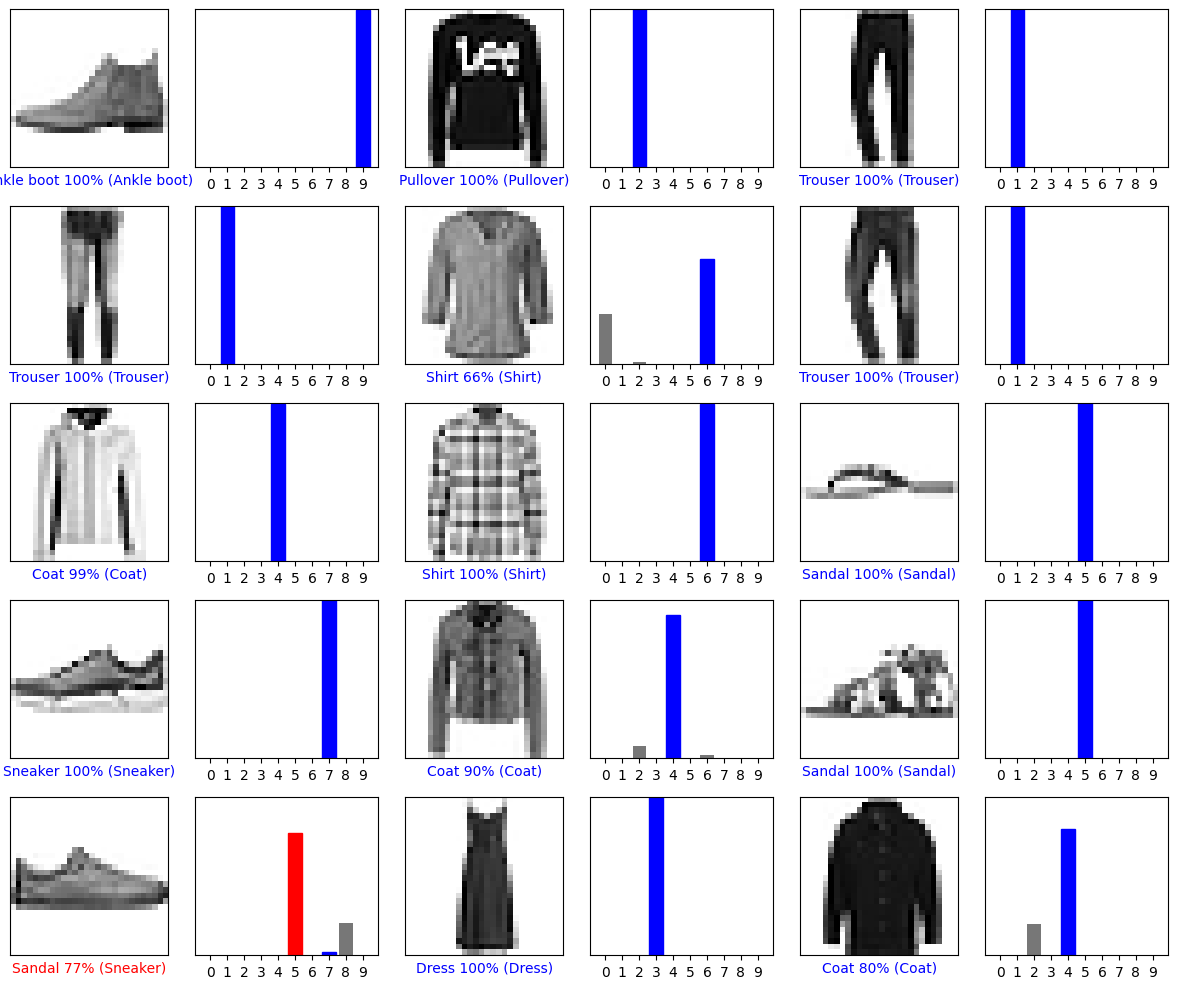

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [55]:
img = test_images[42]

In [58]:
img.shape

(28, 28)

In [59]:
img = np.expand_dims(img,0)

In [60]:
img.shape

(1, 28, 28)

In [61]:
probability_model.predict(img)

1/1 [==============================] - 0s 20ms/step


array([[2.3719792e-01, 2.9441688e-02, 1.7656531e-03, 2.8076348e-01,
        3.7438720e-02, 8.9079073e-09, 4.1301128e-01, 2.7457222e-13,
        3.8126053e-04, 5.9562889e-11]], dtype=float32)